---


In [1]:
#| include: false
# Enter your information below
Student_Name = 'June Skeeter'
Student_Number = 123456789
print(f'GEOS 300 Assignment Submission for {Student_Name}: {Student_Number}')

GEOS 300 Assignment Submission for June Skeeter: 123456789


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [3]:
#| label: Key
#| tbl-cap: Rubric for Assignment 1
Data = pd.read_csv('https://raw.githubusercontent.com/GEOS300/GEOS300.github.io/main/Assignments/Rubrics/01.csv',index_col=False)
Data

,Componenet,Points,Comments
0,Clarity,5,1/2 Document is readable and answers are clear...
1,Question 1,2,"1/2 for correct units, 1/2 for discussion"
2,Question 2,2,"1/4 for correct units, 3/4 for discussion"
3,Question 3,5,1/2 for producing chart (with updated unit lab...
4,Question 4,2,"1/8 for producing chart, 7/8 for discussion"
5,Question 5,8,"1/2 for correct answers & units, 1/2 for corre..."
6,Question 6,9,"1/3 for correct answers & units, 1/3 for corre..."
7,Question 7,9,"1/3 for alculating Rn, 1/3 for making chart, 1..."
8,Question 8,18,1/2 for correctly recreating all graphs/tables...
9,Question 9,10,"1/4 for correct answer and units, 3/4 for disc..."


### Question 1 

Below is an example showing the first few rows of the BB climate summary data.  What values do you see listed for Incoming and outgoing $SW$ in the first row of the table, are these values reasonable?  Why or why not?  

* Make suer to specify the units in your answer. Check the metadata provided [here](https://github.com/GEOS300/AssignmentData/blob/main/Climate_Summary_BB_Metadata.md) to make sure you understand the variable names and units.


In [4]:
# Import the data from github & parse the timestamp for each record
data_url='https://raw.githubusercontent.com/GEOS300/AssignmentData/main/Climate_Summary_BB.csv'
# Pandas (pd here) allows us to set a timestamp as an index which lets us easily parse time series data
df = pd.read_csv(data_url,parse_dates=['TIMESTAMP'],index_col=['TIMESTAMP'])
# Using this we can get a extra variables (DOY & HOUR) that will be helpful later
df['HOUR'] = df.index.hour
df['DOY'] = df.index.dayofyear

# Preview the table using .head()
df.head()

,SW_IN_1_1_1,LW_IN_1_1_1,SW_OUT_1_1_1,LW_OUT_1_1_1,H,G_1,TA_1_1_1,TA_1_2_1,TS_1,TS_2,TS_3,RH_1_1_1,P_1_1_1,PA_1_1_1,WS_1_1_1,WD_1_1_1,VPD_1_1_1,HOUR,DOY
TIMESTAMP,,,,,,,,,,,,,,,,,,,
2022-01-01 00:30:00,0.059775,263.22790,1.358248,271.21440,-29.676018,-5.586875,-7.762711,-9.570630,3.630083,4.214648,7.489783,83.282550,0.0,102.397125,0.659737,0.659737,0.572898,0,1
2022-01-01 01:00:00,0.019907,265.93750,1.101564,274.97858,NaN,-5.553178,-7.200051,-9.533210,3.677612,4.251830,7.531122,82.645550,0.0,102.403420,1.401023,1.401023,0.621187,1,1
2022-01-01 01:30:00,0.102981,268.36322,0.614629,279.22833,NaN,-5.575220,-6.349798,-7.833451,3.669683,4.264247,7.550878,79.349396,0.0,102.417690,1.692178,1.692178,0.789111,1,1
2022-01-01 02:00:00,0.025781,273.88068,0.394172,281.60062,NaN,-5.574099,-6.297862,-7.050872,3.692943,4.280375,7.569431,79.832660,0.0,102.448500,1.855905,1.855905,0.773717,2,1
2022-01-01 02:30:00,0.032684,277.71097,0.381383,283.53964,NaN,-5.562795,-6.020581,-6.729948,3.708760,4.293371,7.578785,79.850450,0.0,102.461420,2.013627,2.013627,0.789605,2,1


#### Answer

More or less what we'd expect, but $SW_\downarrow$ shouldn't be less than $SW_\uparrow$, both should be ~0 zero, so indicates some lack of precision with the sensor (or perhaps a human made light source on site?)  Units $W m^{-2}$.


### Question 2 

We're going to be looking at some data from the January 2024 cold-snap (Jan 12 to Jan 19) and snowstorm (Jan 17-Jan 19) during which record low temperatures were observed and over 25cm of snow was received across the Metro Vancouver area.  The table below shows some descriptive statistics for key variables during this time period.  What was the range of air temperatures observed over this time period?  How does it compare to the range of soil temperatures observed?


In [5]:
# Set a time window and query the dataframe
Start = dt.strptime('2024-01-12 0000', '%Y-%m-%d %H%M')
End = dt.strptime('2024-01-20 0000', '%Y-%m-%d %H%M')

# Select a subset of the variables
Query_Cols = ['DOY','HOUR','SW_IN_1_1_1','LW_IN_1_1_1','SW_OUT_1_1_1', 'LW_OUT_1_1_1','TA_1_1_1','TS_1','RH_1_1_1']

# Run the query and save it to a new dataframe called "Selection"
Selection = df.loc[((df.index>=Start)&(df.index<End)),Query_Cols].copy()
                    
# Generate some descriptive statistics for the data
Selection.describe().round(3)

,DOY,HOUR,SW_IN_1_1_1,LW_IN_1_1_1,SW_OUT_1_1_1,LW_OUT_1_1_1,TA_1_1_1,TS_1,RH_1_1_1
count,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000
mean,15.500,11.500,45.256,255.759,14.706,296.752,-4.576,3.597,80.749
std,2.294,6.931,89.789,51.854,23.028,15.939,4.571,0.625,19.244
min,12.000,0.000,0.000,161.566,0.000,269.093,-13.297,2.607,37.666
25%,13.750,5.750,0.000,215.101,1.267,282.230,-8.566,3.086,65.421
50%,15.500,11.500,0.027,249.904,2.698,299.117,-2.880,3.555,88.566
75%,17.250,17.250,40.290,308.048,18.668,310.924,-0.607,3.979,98.252
max,19.000,23.000,369.341,330.495,114.190,323.107,1.805,4.984,100.000


#### Answer

The key point here is that $T_a$ has a much wider range (~15 $^{\circ} C$) compared to $T_s$ (~2.3 $^{\circ} C$) and that while $T_a$ was well bellow 0 $^{\circ} C$ for most of the period, $T_s$ didn't even drop below 2.5 $^{\circ} C$.

### Question 3

The plot below shows traces of the four radiation component, air & soil temperature, and relative humidity are.  Looking at the plot, what stands out to you?  Comment on the progression of each radiative component over time, using the temperature and humidity data to support your discussion and help explain any patterns you might see.  Do you see any issues in the data?  If so, what is a possible explanation?


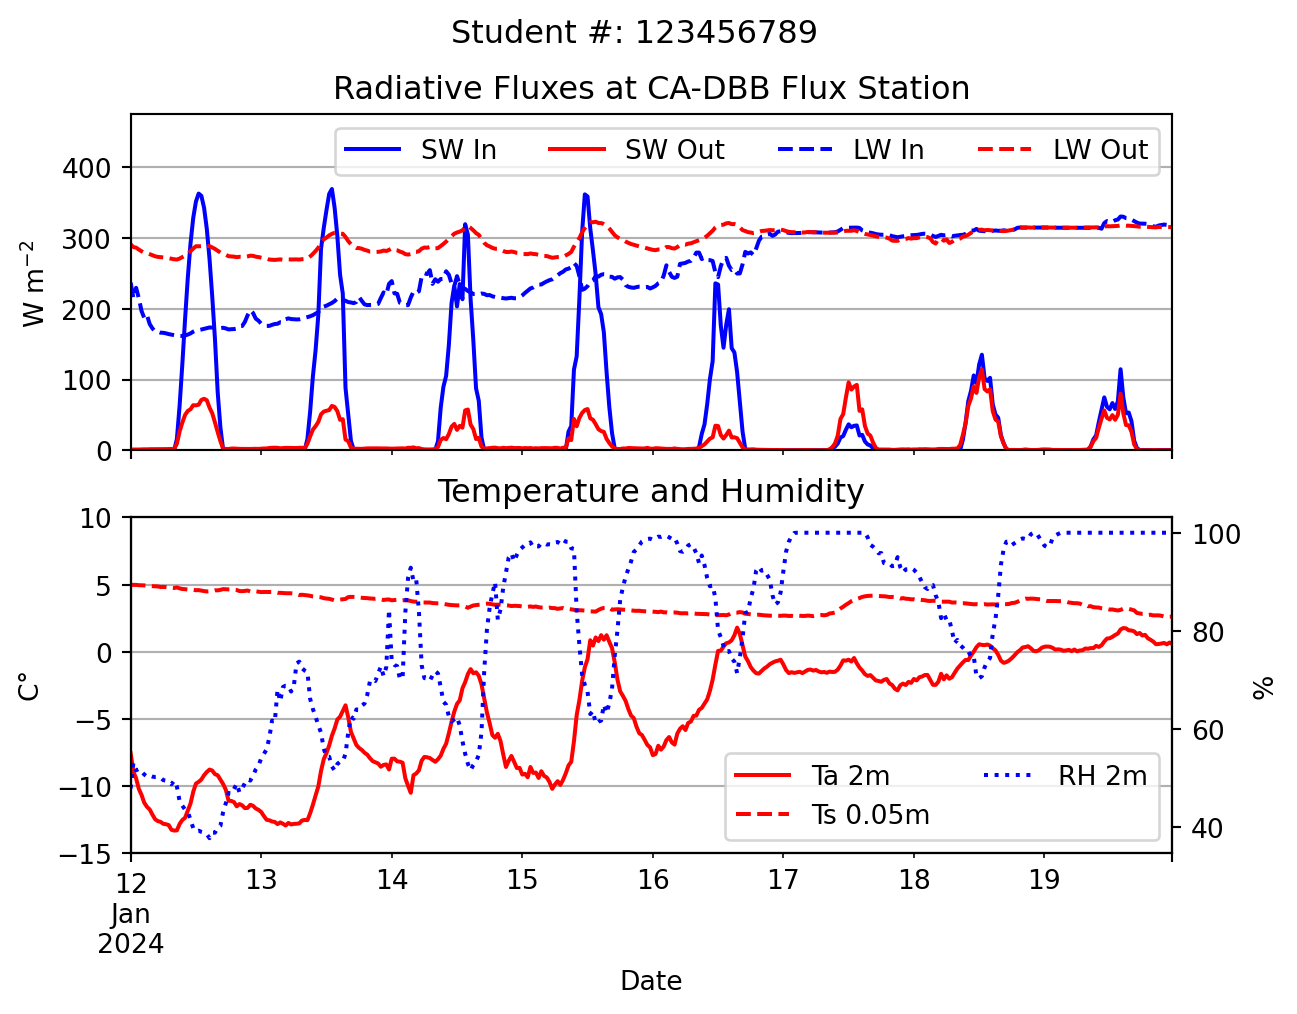

In [6]:
# Create a plot with two sub-plots
# Plot the radiation components on the first sub-plot
# Plot Ta,Ts, and RH on the second sub-plot
fig,axes=plt.subplots(2,sharex=True)
plt.suptitle(f'Student #: {Student_Number}')

Selection.plot(ax=axes[0],
              y=['SW_IN_1_1_1','SW_OUT_1_1_1','LW_IN_1_1_1','LW_OUT_1_1_1'],
              color=['blue','red','blue','red'],
              style=['-','-','--','--'])
axes[0].legend(['SW In','SW Out','LW In','LW Out'],ncol=4)

# Note: You can use a markup language called LaTeX to format labels.  Replace Units,subscript, and superscript with the appropriate unit for radiative fluxes
axes[0].set_ylabel('W m$^{-2}$')
axes[0].set_ylim([0,475])
axes[0].set_title(f'Radiative Fluxes at CA-DBB Flux Station')
axes[0].grid()

# For this plot we're going to plot temperature on the left axes and RH on the right axes
axes[1].plot()
second_yaxes = axes[1].twinx()

# A simple "hack" to get the element from second_yaxes (RH_1_1_1) to show up with the legend items for the main yaxis
Selection['Dummy_Trace'] = np.nan
Selection.plot(ax=axes[1],
              y=['TA_1_1_1','TS_1','Dummy_Trace'],
              color=['red','red','blue'],
              style=['-','--',':'])
axes[1].legend(['Ta 2m','Ts 0.05m','RH 2m'],ncol=2,loc=4)
axes[1].set_ylabel('C$\degree$')
axes[1].set_ylim([-15,10])

Selection.plot(ax=second_yaxes,
              y=['RH_1_1_1'],
              color=['blue'],
              style=[':'],
              legend=False)
second_yaxes.set_ylabel('%')

axes[1].set_xlabel('Date')
axes[1].set_title('Temperature and Humidity')
axes[1].grid()

#### Answer

Important to discuss how $LW$ varies as a function of temperature [$\downarrow$ (sky/clouds); $\uparrow$ (ground)] and how $SW_\downarrow$ & $SW_\uparrow$ are effected by cloud/snow.  Big issue on day of snowfall, radiometer is covered in snow; $SW_\downarrow$ should not be larger than $SW_\uparrow$


### Question 4

The plot below shows mean daily albedo.  What explains sharp increase on the 17th?


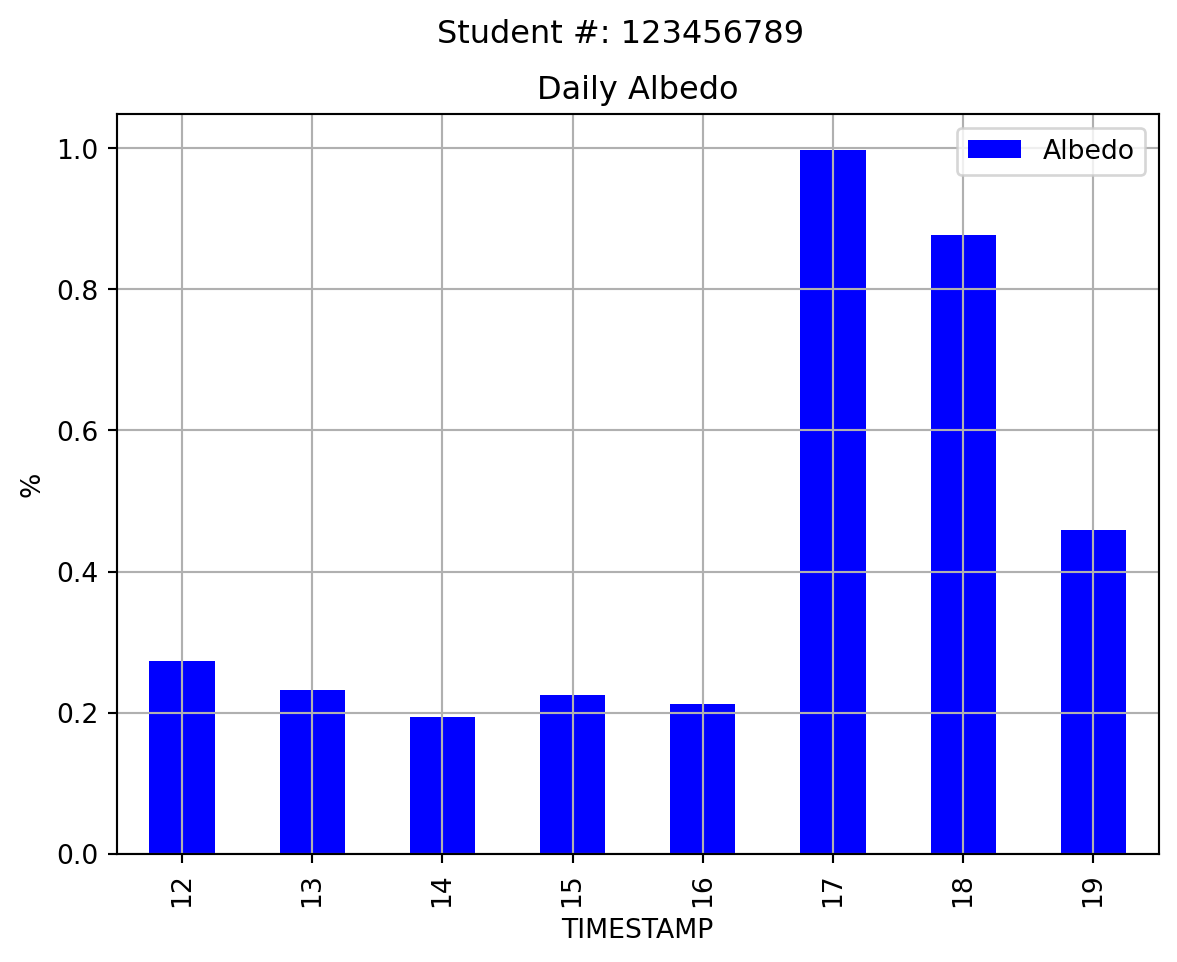

In [7]:
# Create a single plot bar showing mean daily albedo

# Calculate Albedo
Selection['Albedo'] = Selection['SW_OUT_1_1_1']/Selection['SW_IN_1_1_1']
# Filter out implausible values
Selection.loc[Selection['SW_OUT_1_1_1']>Selection['SW_IN_1_1_1'],'Albedo']=np.nan

# Resample to get mean daily Albedo, ignoring the NaN values
DailyAlbedo = Selection.resample('D').mean()
DailyAlbedo.index = DailyAlbedo.index.dayofyear

fig,ax=plt.subplots()
plt.suptitle(f'Student #: {Student_Number}')
DailyAlbedo.plot.bar(ax=ax,y='Albedo',color='blue')
ax.set_ylabel('%')
ax.set_title('Daily Albedo')
ax.grid()

#### Answer

Fresh snow has a much higher albedo than either vegetated surfaces.  The significant snowfall event (30 cm) was more than enough to cover all the vegetation.

## Question 5

The maximum half-hourly $SW_\downarrow$ observed during this time period occurred between 12:30 and 13:00 on January 13th.  Using the equations from lecture, calculate the Local Apparent Time (LAT), solar declination $\delta$, solar zenith angle $Z$, and extraterrestrial irradiance $I_{ex}$ for the center point of this observation period (12:45).  Given the value of $I_{ex}$, compared to observed $SW_\downarrow$, what is the approximate bulk transmissivity ($\Psi_a$) coefficient of the atmosphere over CA-DBB at this point in time?  Given the value of $I_{ex}$, compared to observed $SW_\downarrow$, what is the approximate bulk transmissivity ($\Psi_a$) coefficient of the atmosphere over CA-DBB at this point in time?  

**Note**: you can find the site's Lat/Lon and time zone info in the CA-DBB station metadata file.


#### Answer

Equations are in lecture [4](https://geos300.github.io/Lectures/04.html#/title-slide) & [5](https://geos300.github.io/Lectures/04.html#/title-slide) with examples for time calculations in study question [2](https://geos300.github.io/Study_Questions/02.html),

Get the declination as follows:


$$
\begin{eqnarray}
\delta = & 0.006918 - 0.399912 \cos( \gamma)+0.070257 \sin( \gamma)  \\
         & -0.006758 \cos(2 \gamma) + 0.000907\sin(2\gamma) \nonumber \\
         & -0.002697\cos(3\gamma)+0.00148 \sin(3\gamma) \nonumber 
\end{eqnarray}
$${#eq-Solar-Declination}

where $\gamma$ is the fractional year and DOY is the day of the year:

$$
\gamma = \frac{2 \pi }{365} (DOY-1) 
$${#eq-Fractional-Year}



And local Apparent time:


$$
LMST = (TZ) + (\lambda-TZ_{m})\frac{4}{60}
$${#eq-LMST}

where $\lambda$ is longitude, $TZ$ is time in LST (e.g., PST = UTC-8) **in hours**, and $TZ_{m}$ is the central meridian for a given time zone (e.g., PST = -120 $^{\circ}$).  You can then calculate the local apparent time LAT as:

$$
LAT = LMST-\Delta LAT
$${#eq-LAT}

and $\Delta LAT$ is:
$$
\begin{eqnarray}
\Delta LAT = & 229.18[0.000075+0.001868\cos(\gamma)-0.032077\sin(\gamma) \\
             & -0.014615\cos(2\gamma)-0.040849\sin(2\gamma)]
\end{eqnarray}
$${#eq-Delta-LAT}




And the zenith ($Z$) following:


$$
\cos(Z) = \sin(\beta) = \sin(\Phi)\sin(\delta)+\cos(\Phi)\cos(\delta)\cos(h)
$${#eq-Solar-Zenith}

where the hour angle (h) is a function of local apparent time (LAT):

$$
h = 15^{\circ}(12-LAT)
$${#eq-Hour-Angle}



With the zenith an the fractional DOY, you can then get $I_{ex}$


The solar input at top of the atmosphere at any time and location hence is given as $I_ex$:
$$
I_{ex}=I_0(\frac{R_{av}}{R})^2\cos(Z)
$${#eq-Extraterrestrial-Irradiance}

where $I_0 \approx 1361 W m^{-2}$, $\cos(Z)$ applies the cosine law of illumination, and $(\frac{R_av}{R})$ adjusts the solar constant Earth's elliptic orbit:  
$$
\begin{eqnarray}
(\frac{R_{av}}{R})^2 = & 1.00011+0.034221\cos(\gamma)+0.001280\sin(\gamma)+\\
                     &0.000819\cos(2\gamma)+0.000077\sin(2\gamma)
\end{eqnarray}
$${#eq-Adjusted-Constant}



Use $Z$ and $I_{ex}$ to solve for $\Phi_a$


$$
SW_\downarrow = I_{ex} \Psi_a^{m}
$${#eq-Bulk-Transmissivity}

where 

$$
m = \frac{1}{\cos(Z)} = \frac{1}{\sin(\beta)}
$$


In [8]:
DOY = 13 # January 13th
TIME = 12.75 # Fractional hours
latitude = 49.12940598 # degrees
longitude = -122.9849319 # degrees
central_meridian_PST = -120 # degrees
I_0 = 1361 # Wm-2
SW_in = Selection['SW_IN_1_1_1'].max()# Observed SW incoming # W m-2

gamma = 2*np.pi /365*(DOY-1) 
print('gamma = ',gamma)
delta = 0.006918 - 0.399912 *np.cos(gamma)+0.070257 *np.sin(gamma)  \
         -0.006758* np.cos(2*gamma) + 0.000907*np.sin(2*gamma)  \
         -0.002697*np.cos(3*gamma)+0.00148 *np.sin(3*gamma)
print('delta = ',delta,'in radians, or ',delta*180/np.pi,' in degrees works too\n')

LMST = TIME+(longitude-central_meridian_PST)*4/60
print('LMST = ',LMST,' in hours')
print('**Note**: their was an error in the LMST equation in the lecture slide, which has since been corrected.')
LMST_error = TIME-(longitude-central_meridian_PST)*4/60
print('Following the incorrect equation would yield: ',LMST_error, ' accept this, along with calculations of LAT, h, and z based on it')

Delta_LAT = 229.18*(0.000075+0.001868*np.cos(gamma)-0.032077*np.sin(gamma) \
             -0.014615*np.cos(2*gamma)-0.040849*np.sin(2*gamma))
print('Delta_LAT = ',Delta_LAT,' in minutes')

LAT = LMST-Delta_LAT/60
print('LAT',LAT)
LAT_error=LMST_error-Delta_LAT/60
print('**Note**: ',LAT_error,' is also acceptable as per above\n')

h = 15*(12-LAT)
print('hour-angle = ',h,' in degrees')
h_error = 15*(12-LAT_error)
print('**Note**: ',h_error,' is also acceptable as per above\n')

cos_z = np.sin(latitude*np.pi/180)*np.sin(delta)+np.cos(latitude*np.pi/180)*np.cos(delta)*np.cos(h*np.pi/180)
z = np.arccos(cos_z)*180/np.pi
print('zenith angle = ',z,' in degrees')
cos_z_error = np.sin(latitude*np.pi/180)*np.sin(delta)+np.cos(latitude*np.pi/180)*np.cos(delta)*np.cos(h_error*np.pi/180)
z_error = np.arccos(cos_z_error)*180/np.pi
print('**Note** ',z_error,'is also acceptable as per above < the error has a minor impact on the answer.\n')

R_av_Rsq = 1.00011+0.034221*np.cos(gamma)+0.001280*np.sin(gamma)+\
            0.000819*np.cos(2*gamma)+0.000077*np.sin(2*gamma)
I_ex=I_0*R_av_Rsq*np.cos(z*np.pi/180)
print('Extraterrestrial Irradiance = ',I_ex, 'W m-2')
I_ex_error=I_0*R_av_Rsq*np.cos(z_error*np.pi/180)
print('**Note** ',I_ex_error,'is also acceptable as per above < the error has a minor impact on the answer.\n')

m = 1/np.cos(z*np.pi/180)
m_error = 1/np.cos(z_error*np.pi/180)

Psi_a = (SW_in/I_ex)**(1/m)
print('Bulk transimissivity = ',Psi_a)
Psi_a_error = (SW_in/I_ex)**(1/m_error)
print('**Note** ',Psi_a_error,'is also acceptable as per above < the error has a minor impact on the answer.\n')

gamma =  0.20657047585247953
delta =  -0.37724303517583996 in radians, or  -21.614433766280886  in degrees works too

LMST =  12.55100454  in hours
**Note**: their was an error in the LMST equation in the lecture slide, which has since been corrected.
Following the incorrect equation would yield:  12.94899546  accept this, along with calculations of LAT, h, and z based on it
Delta_LAT =  -7.897907200098055  in minutes
LAT 12.6826363266683
**Note**:  13.080627246668302  is also acceptable as per above

hour-angle =  -10.2395449000245  in degrees
**Note**:  -16.209408700024525  is also acceptable as per above

zenith angle =  71.33083441425887  in degrees
**Note**  72.20517626473348 is also acceptable as per above < the error has a minor impact on the answer.

Extraterrestrial Irradiance =  450.75477348124923 W m-2
**Note**  430.34511353711304 is also acceptable as per above < the error has a minor impact on the answer.

Bulk transimissivity =  0.9382246449793787
**Note**  0.940937444093

### Question 6

Now calculate $\Psi_a$ for 12:45 January 19; the observed value of $SW_\downarrow$ was between 12:30 and 13:00 was 58.375 W$^m{-2}$.  What explains the difference between these two days?

#### Answer

Same procedures as above, the key cause of the difference cloud cover.  Significantly more light is attenuated on the cloudy day, that light is reflected back to space by clouds (some is also absorbed) before making it to ground level.


In [9]:
DOY = 19 # January 19th
TIME = 12.75 # Fractional hours
latitude = 49.12940598 # degrees
longitude = -122.9849319 # degrees
central_meridian_PST = -120 # degrees
I_0 = 1361 # Wm-2
SW_in = 58.375 # Observed SW incoming # W m-2

gamma = 2*np.pi /365*(DOY-1) 
print('gamma = ',gamma)
delta = 0.006918 - 0.399912 *np.cos(gamma)+0.070257 *np.sin(gamma)  \
         -0.006758* np.cos(2*gamma) + 0.000907*np.sin(2*gamma)  \
         -0.002697*np.cos(3*gamma)+0.00148 *np.sin(3*gamma)
print('delta = ',delta,'in radians, or ',delta*180/np.pi,' in degrees works too\n')

LMST = TIME+(longitude-central_meridian_PST)*4/60
print('LMST = ',LMST,' in hours')
print('**Note**: their was an error in the LMST equation in the lecture slide, which has since been corrected.')
LMST_error = TIME-(longitude-central_meridian_PST)*4/60
print('Following the incorrect equation would yield: ',LMST_error, ' accept this, along with calculations of LAT, h, and z based on it')

Delta_LAT = 229.18*(0.000075+0.001868*np.cos(gamma)-0.032077*np.sin(gamma) \
             -0.014615*np.cos(2*gamma)-0.040849*np.sin(2*gamma))
print('Delta_LAT = ',Delta_LAT,' in minutes')

LAT = LMST-Delta_LAT/60
print('LAT',LAT)
LAT_error=LMST_error-Delta_LAT/60
print('**Note**: ',LAT_error,' is also acceptable as per above\n')

h = 15*(12-LAT)
print('hour-angle = ',h,' in degrees')
h_error = 15*(12-LAT_error)
print('**Note**: ',h_error,' is also acceptable as per above\n')

cos_z = np.sin(latitude*np.pi/180)*np.sin(delta)+np.cos(latitude*np.pi/180)*np.cos(delta)*np.cos(h*np.pi/180)
z = np.arccos(cos_z)*180/np.pi
print('zenith angle = ',z,' in degrees')
cos_z_error = np.sin(latitude*np.pi/180)*np.sin(delta)+np.cos(latitude*np.pi/180)*np.cos(delta)*np.cos(h_error*np.pi/180)
z_error = np.arccos(cos_z_error)*180/np.pi
print('**Note** ',z_error,'is also acceptable as per above < the error has a minor impact on the answer.\n')

R_av_Rsq = 1.00011+0.034221*np.cos(gamma)+0.001280*np.sin(gamma)+\
            0.000819*np.cos(2*gamma)+0.000077*np.sin(2*gamma)
I_ex=I_0*R_av_Rsq*np.cos(z*np.pi/180)
print('Extraterrestrial Irradiance = ',I_ex, 'W m-2')
I_ex_error=I_0*R_av_Rsq*np.cos(z_error*np.pi/180)
print('**Note** ',I_ex_error,'is also acceptable as per above < the error has a minor impact on the answer.\n')

m = 1/np.cos(z*np.pi/180)
m_error = 1/np.cos(z_error*np.pi/180)

Psi_a = (SW_in/I_ex)**(1/m)
print('Bulk transimissivity = ',Psi_a)
Psi_a_error = (SW_in/I_ex)**(1/m_error)
print('**Note** ',Psi_a_error,'is also acceptable as per above < the error has a minor impact on the answer.\n')

gamma =  0.3098557137787193
delta =  -0.35792818775237806 in radians, or  -20.507774526977382  in degrees works too

LMST =  12.55100454  in hours
**Note**: their was an error in the LMST equation in the lecture slide, which has since been corrected.
Following the incorrect equation would yield:  12.94899546  accept this, along with calculations of LAT, h, and z based on it
Delta_LAT =  -9.980631058029838  in minutes
LAT 12.717348390967164
**Note**:  13.115339310967165  is also acceptable as per above

hour-angle =  -10.760225864507458  in degrees
**Note**:  -16.73008966450748  is also acceptable as per above

zenith angle =  70.29438713363702  in degrees
**Note**  71.21479106776923 is also acceptable as per above < the error has a minor impact on the answer.

Extraterrestrial Irradiance =  474.42479382871187 W m-2
**Note**  453.08588607201614 is also acceptable as per above < the error has a minor impact on the answer.

Bulk transimissivity =  0.4933776314395113
**Note**  0.5093071563

### Question 7

Using the examples above as a template, calculate $R_n$ over the cold-snap.  Make a scatter plot showing $R_n$ on the y-axis and $SW_\downarrow$ on the x-axis.  Describe the relationship you.

#### Answer

First, must calculate $R_n$ following:


$$
R_n = (SW \downarrow - SW \uparrow) + (LW \downarrow - LW \uparrow)
$${#eq-Net-Radiation}




The relationship between the two: $SW_\downarrow$ is a significant driver of $R_n$, whien it is positive, it has a strong increasing effect on $R_n$ (but the slope modified by albedo).  However, the effects of $LW$ are also present in the $R_n$ signal, so it is not a simple linear relationship with $SW*$


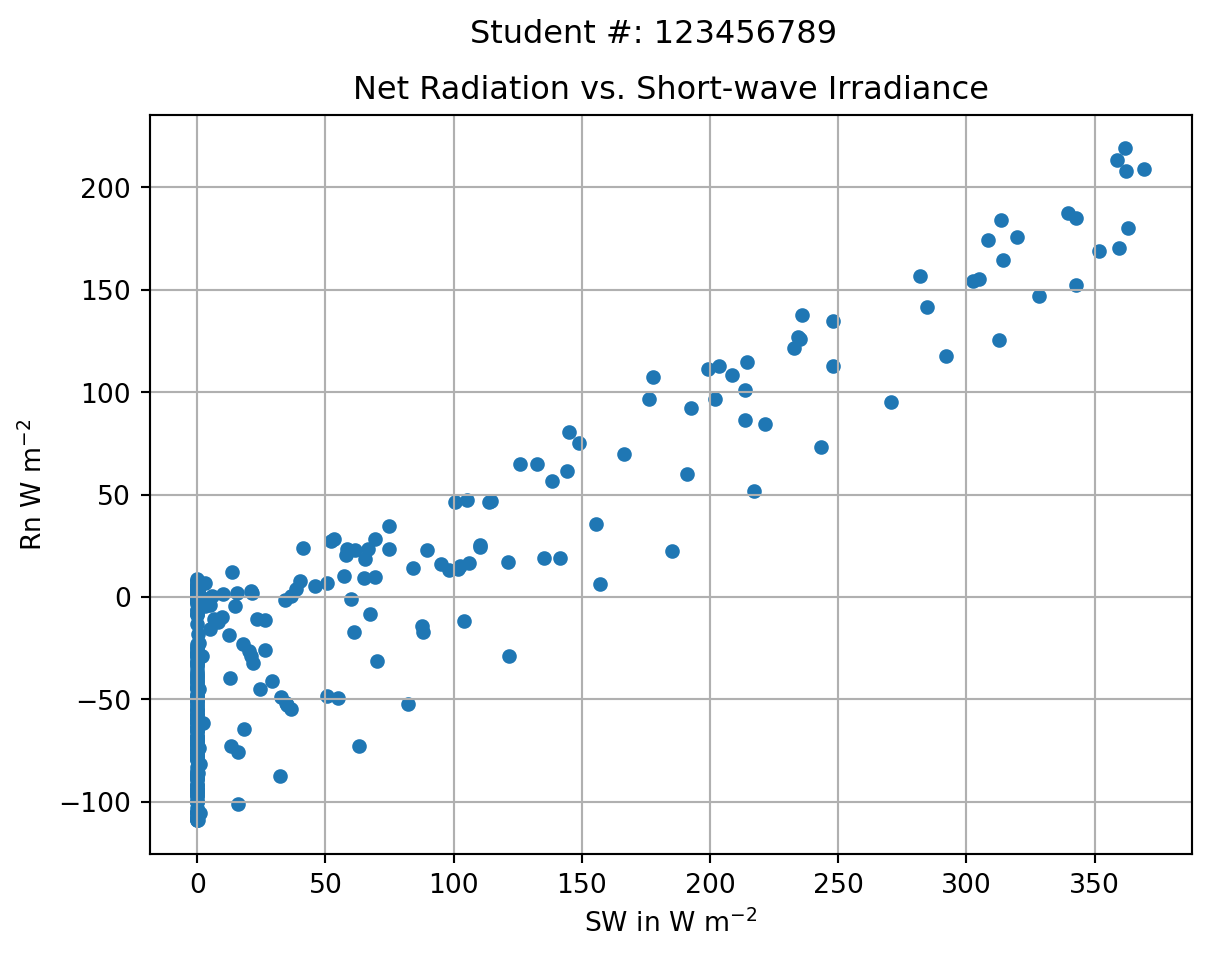

In [10]:
# Create a scatter plot

Selection['R_n'] = Selection['SW_IN_1_1_1']-Selection['SW_OUT_1_1_1']+Selection['LW_IN_1_1_1']-Selection['LW_OUT_1_1_1']

fig,ax=plt.subplots()
plt.suptitle(f'Student #: {Student_Number}')
Selection.plot(ax=ax,kind='scatter',y='R_n',x='SW_IN_1_1_1')
ax.set_ylabel('Rn W m$^{-2}$')
ax.set_xlabel('SW in W m$^{-2}$')
ax.set_title('Net Radiation vs. Short-wave Irradiance')
ax.grid()

### Question 8

Using the examples above as a template, create a new selection to see how typical summertime conditions compare to severe winter time conditions.  Change the selection period so that it spans July 12th to July 19th, 2023.  Provide summary statistics of the same variables as those shown above and produce plots like the ones shown above as well. Discuss how each of these variables during this mid-summer period compare to those from the cold-snap period.


#### Answer

Should reproduce **All** graphs and tables above so that there can be a well rounded comparison. **For plots:** make sure all axes limits are updated properly.  Key discussion points:

* Warmer weather (both $T_a$ and $T_s$).  While $T_a$ is still higher and more variable than $T_s$, it is important to note that $T_s$ in summer has a similar range as in winter.
    + Should also mention data gap in $T_s$ for full credit.

* More incoming $SW$ due to lower zenith angle and longer days.  Less variable due to less cloud cover.  Primarily clear sky conditions in summer
* More incoming/outgoing $LW$ due to higher temps of both ground and sky.  Less variable due to less cloud cover.  Primarily clear sky conditions in summer
* Albedo is lower due to lack of snow **and** green vegetation.
* $R_n$ vs $SW_\downarrow$ is more direct because of lack of snow and reduced variability in $LW$
* $RH$ is "lower" at times, but does not indicate drier atmosphere, because warm air can hold more water vapor


In [11]:
# Set a time window and query the dataframe
Start = dt.strptime('2023-07-12 0000', '%Y-%m-%d %H%M')
End = dt.strptime('2023-07-20 0000', '%Y-%m-%d %H%M')

# Select a subset of the variables
Query_Cols = ['DOY','HOUR','SW_IN_1_1_1','LW_IN_1_1_1','SW_OUT_1_1_1', 'LW_OUT_1_1_1','TA_1_1_1','TS_1','RH_1_1_1']

# Run the query and save it to a new dataframe called "Selection"
Selection = df.loc[((df.index>=Start)&(df.index<End)),Query_Cols].copy()
                    
# Generate some descriptive statistics for the data
Selection.describe().round(3)

,DOY,HOUR,SW_IN_1_1_1,LW_IN_1_1_1,SW_OUT_1_1_1,LW_OUT_1_1_1,TA_1_1_1,TS_1,RH_1_1_1
count,384.000,384.000,384.000,384.000,384.000,384.000,384.000,273.000,384.000
mean,196.500,11.500,312.663,348.073,41.283,421.506,18.706,16.706,77.331
std,2.294,6.931,330.573,16.929,38.350,48.090,5.291,0.418,16.846
min,193.000,0.000,0.000,312.911,0.312,346.052,8.609,15.035,43.112
25%,194.750,5.750,0.000,336.154,1.992,375.950,14.508,16.343,62.581
50%,196.500,11.500,195.154,347.398,33.877,417.112,18.843,16.734,79.089
75%,198.250,17.250,642.375,358.918,80.291,462.301,23.250,16.998,93.278
max,200.000,23.000,926.505,389.893,113.806,512.630,30.224,17.694,100.000


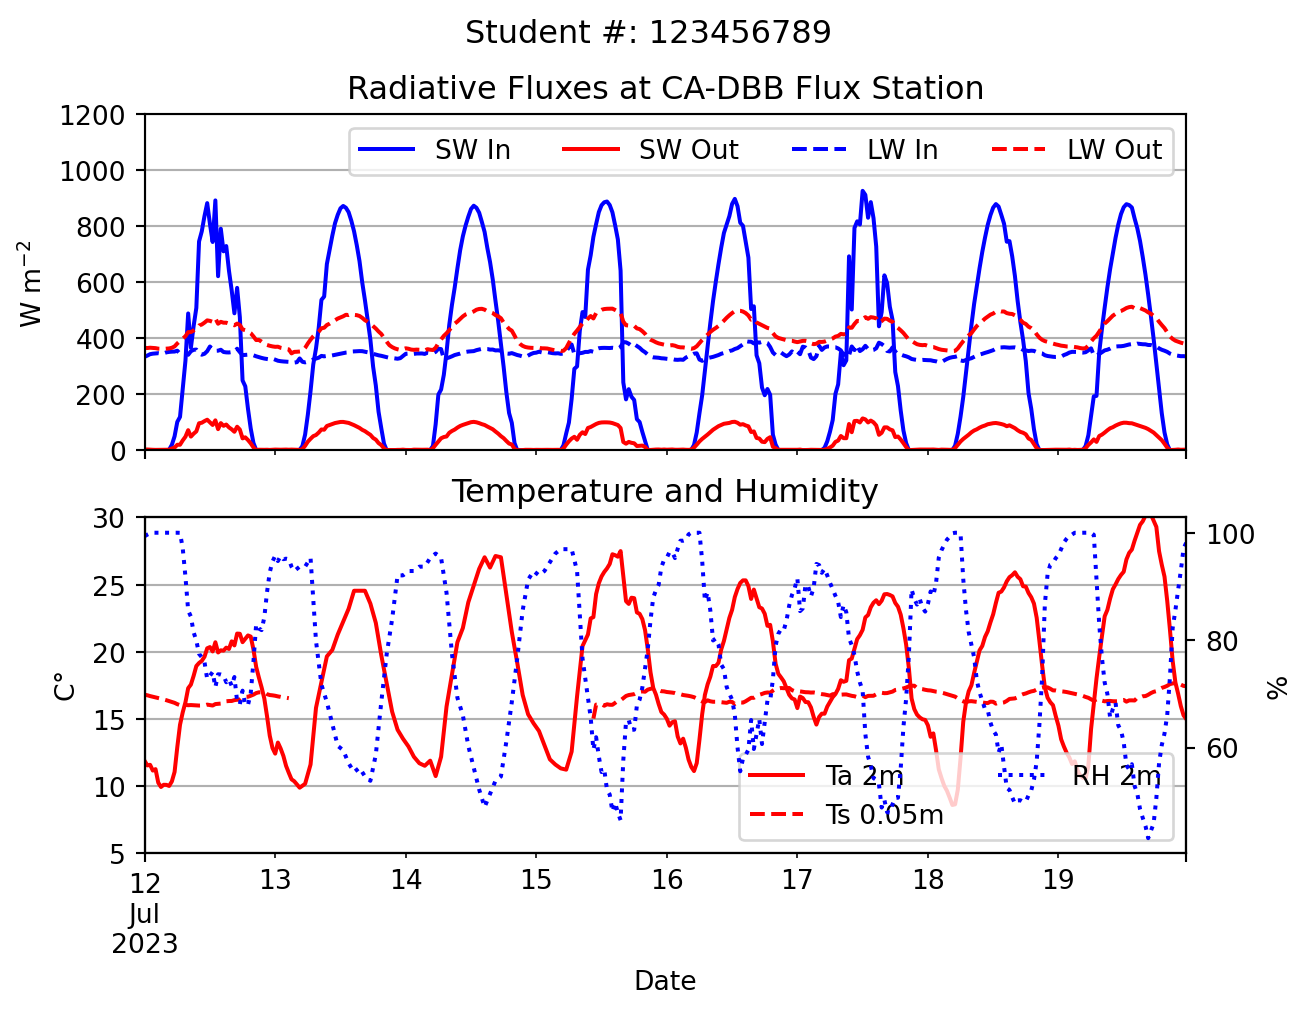

In [12]:
# Create a plot with two sub-plots
# Plot the radiation components on the first sub-plot
# Plot Ta,Ts, and RH on the second sub-plot
fig,axes=plt.subplots(2,sharex=True)
plt.suptitle(f'Student #: {Student_Number}')

Selection.plot(ax=axes[0],
              y=['SW_IN_1_1_1','SW_OUT_1_1_1','LW_IN_1_1_1','LW_OUT_1_1_1'],
              color=['blue','red','blue','red'],
              style=['-','-','--','--'])
axes[0].legend(['SW In','SW Out','LW In','LW Out'],ncol=4)

# Note: You can use a markup language called LaTeX to format labels.  Replace Units,subscript, and superscript with the appropriate unit for radiative fluxes
axes[0].set_ylabel('W m$^{-2}$')
axes[0].set_ylim([0,1200])
axes[0].set_title(f'Radiative Fluxes at CA-DBB Flux Station')
axes[0].grid()

# For this plot we're going to plot temperature on the left axes and RH on the right axes
axes[1].plot()
second_yaxes = axes[1].twinx()

# A simple "hack" to get the element from second_yaxes (RH_1_1_1) to show up with the legend items for the main yaxis
Selection['Dummy_Trace'] = np.nan
Selection.plot(ax=axes[1],
              y=['TA_1_1_1','TS_1','Dummy_Trace'],
              color=['red','red','blue'],
              style=['-','--',':'])
axes[1].legend(['Ta 2m','Ts 0.05m','RH 2m'],ncol=2,loc=4)
axes[1].set_ylabel('C$\degree$')
axes[1].set_ylim([5,30])

Selection.plot(ax=second_yaxes,
              y=['RH_1_1_1'],
              color=['blue'],
              style=[':'],
              legend=False)
second_yaxes.set_ylabel('%')

axes[1].set_xlabel('Date')
axes[1].set_title('Temperature and Humidity')
axes[1].grid()

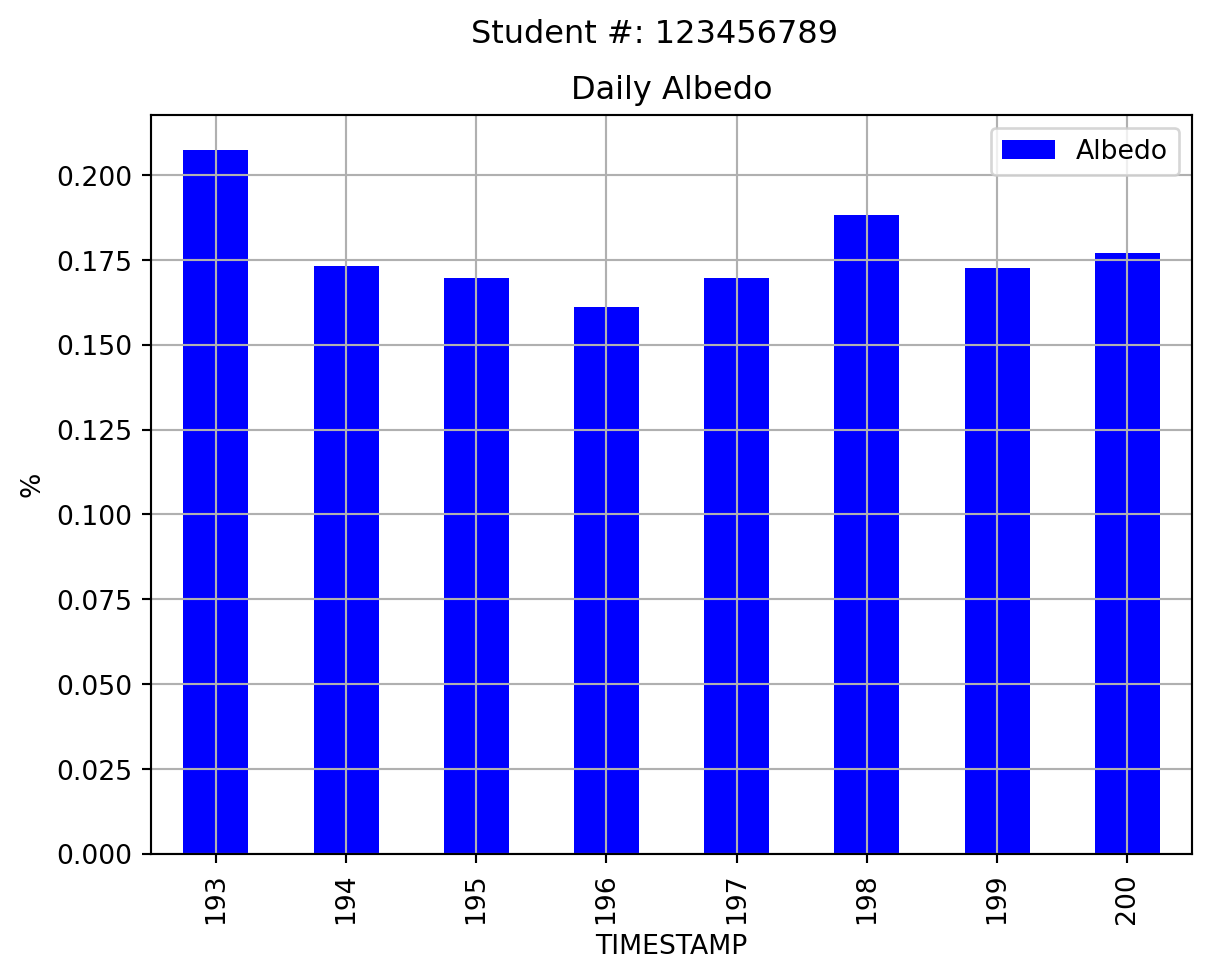

In [13]:
# Create a single plot bar showing mean daily albedo

# Calculate Albedo
Selection['Albedo'] = Selection['SW_OUT_1_1_1']/Selection['SW_IN_1_1_1']
# Filter out implausible values
Selection.loc[Selection['SW_OUT_1_1_1']>Selection['SW_IN_1_1_1'],'Albedo']=np.nan

# Resample to get mean daily Albedo, ignoring the NaN values
DailyAlbedo = Selection.resample('D').mean()
DailyAlbedo.index = DailyAlbedo.index.dayofyear

fig,ax=plt.subplots()
plt.suptitle(f'Student #: {Student_Number}')
DailyAlbedo.plot.bar(ax=ax,y='Albedo',color='blue')
ax.set_ylabel('%')
ax.set_title('Daily Albedo')
ax.grid()

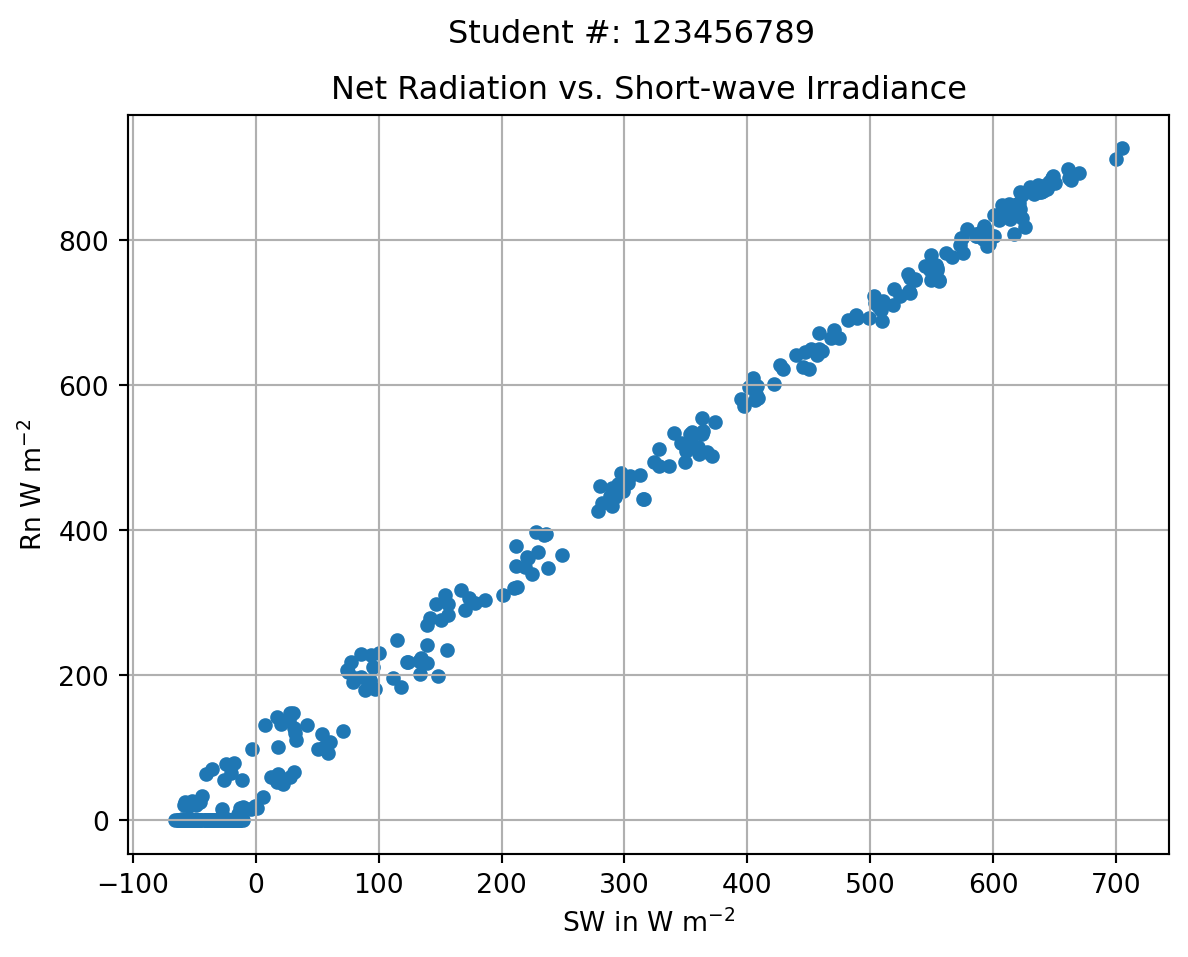

In [14]:
# Create a scatter plot

Selection['R_n'] = Selection['SW_IN_1_1_1']-Selection['SW_OUT_1_1_1']+Selection['LW_IN_1_1_1']-Selection['LW_OUT_1_1_1']

fig,ax=plt.subplots()
plt.suptitle(f'Student #: {Student_Number}')
Selection.plot(ax=ax,kind='scatter',x='R_n',y='SW_IN_1_1_1')
ax.set_ylabel('Rn W m$^{-2}$')
ax.set_xlabel('SW in W m$^{-2}$')
ax.set_title('Net Radiation vs. Short-wave Irradiance')
ax.grid()

### Question 9

Find the timestamp of the observation interval when maximum $SW_\downarrow$ was observed for the mid-summer period.  You will use observations from this timestamp to answer each of the questions below.  **Note** our sites do not use daylight savings, so the UTC offset is fixed all year.  Use this information to calculate $I_{ex}$ and $\Psi_a$ for the mid-point of this observation period.  Discus how these two values compare between this observation, and the observation spanning between 12:30 and 13:00 on January 13th of 2024.  How does the magnitude differ and why does the relative timing of the maximum daily $SW_\downarrow$ differ?

#### Answer

Same procedures as question 5 for calculations.  Key discussion points:

* The magnitude of $I_{ex}$ differs because of the solar declination $\delta$ change giving us a lower zenith angle $z$ and therefore more concentrated solar beam (closer to $I_0$), despite the fact that the earth is slightly farther from the sun during the northern hemisphere summer.  

* $Psi_a$ is higher because the atmosphere has higher moisture content in the summer along with higher particulate matter content (this was discussion point from lecture).  This is interesting, because although the path length is much shorter in for this observation period than in winter, overall attenuation of the solar beam during this timestamp (~19%) exceeded that at 12:45 January 13th (~15%).  This highlights the impacts of air quality and water vapor content.

* The timing of the maximum differs because:
    1. $\Delta LAT$ changes through the year.  Not because of DST; as the sites don't use it. Local apparent time  
    2. Part of it is "randomness" due to cloud conditions 
        + explanation not needed for full credit: the 17th had some patchy cloud cover as indicated by the jumpiness of the SW trace on this day.  If there are clouds blocking the solar beam's path to the radiometer but some large reflective clouds to the north, some "excess" $SW$ reelected off the cloud can hit the radiometer and boost $SW_\downarrow$ a bit.


In [15]:
SW_in = Selection['SW_IN_1_1_1'].max()# Observed SW incoming # W m-2
print('Maximum SW = ',SW_in,'W m-2')

Max_SW_Obs = Selection.loc[Selection['SW_IN_1_1_1']==Selection['SW_IN_1_1_1'].max(),'SW_IN_1_1_1']
Max_SW_TIMESTAMP = Max_SW_Obs.index[0]
print('Timestamp of the maximum SW observation =', Max_SW_TIMESTAMP)

# Must divide minutes by 60 and subtract 15/60 to get fractional hour of mid-point
Time = Max_SW_TIMESTAMP.hour+Max_SW_TIMESTAMP.minute/60-15/60
DOY = Max_SW_TIMESTAMP.dayofyear

latitude = 49.12940598 # degrees
longitude = -122.9849319 # degrees
central_meridian_PST = -120 # degrees
I_0 = 1361 # Wm-2

gamma = 2*np.pi /365*(DOY-1) 
print('gamma = ',gamma)
delta = 0.006918 - 0.399912 *np.cos(gamma)+0.070257 *np.sin(gamma)  \
         -0.006758* np.cos(2*gamma) + 0.000907*np.sin(2*gamma)  \
         -0.002697*np.cos(3*gamma)+0.00148 *np.sin(3*gamma)
print('delta = ',delta,'in radians, or ',delta*180/np.pi,' in degrees works too\n')

LMST = TIME+(longitude-central_meridian_PST)*4/60
print('LMST = ',LMST,' in hours')
print('**Note**: their was an error in the LMST equation in the lecture slide, which has since been corrected.')
LMST_error = TIME-(longitude-central_meridian_PST)*4/60
print('Following the incorrect equation would yield: ',LMST_error, ' accept this, along with calculations of LAT, h, and z based on it')

Delta_LAT = 229.18*(0.000075+0.001868*np.cos(gamma)-0.032077*np.sin(gamma) \
             -0.014615*np.cos(2*gamma)-0.040849*np.sin(2*gamma))
print('Delta_LAT = ',Delta_LAT,' in minutes')

LAT = LMST-Delta_LAT/60
print('LAT',LAT)
LAT_error=LMST_error-Delta_LAT/60
print('**Note**: ',LAT_error,' is also acceptable as per above\n')

h = 15*(12-LAT)
print('hour-angle = ',h,' in degrees')
h_error = 15*(12-LAT_error)
print('**Note**: ',h_error,' is also acceptable as per above\n')

cos_z = np.sin(latitude*np.pi/180)*np.sin(delta)+np.cos(latitude*np.pi/180)*np.cos(delta)*np.cos(h*np.pi/180)
z = np.arccos(cos_z)*180/np.pi
print('zenith angle = ',z,' in degrees')
cos_z_error = np.sin(latitude*np.pi/180)*np.sin(delta)+np.cos(latitude*np.pi/180)*np.cos(delta)*np.cos(h_error*np.pi/180)
z_error = np.arccos(cos_z_error)*180/np.pi
print('**Note** ',z_error,'is also acceptable as per above < the error has a minor impact on the answer.\n')

R_av_Rsq = 1.00011+0.034221*np.cos(gamma)+0.001280*np.sin(gamma)+\
            0.000819*np.cos(2*gamma)+0.000077*np.sin(2*gamma)
I_ex=I_0*R_av_Rsq*np.cos(z*np.pi/180)
print('Extraterrestrial Irradiance = ',I_ex, 'W m-2')
I_ex_error=I_0*R_av_Rsq*np.cos(z_error*np.pi/180)
print('**Note** ',I_ex_error,'is also acceptable as per above < the error has a minor impact on the answer.\n')

m = 1/np.cos(z*np.pi/180)
m_error = 1/np.cos(z_error*np.pi/180)

Psi_a = (SW_in/I_ex)**(1/m)
print('Bulk transimissivity = ',Psi_a)
Psi_a_error = (SW_in/I_ex)**(1/m_error)
print('**Note** ',Psi_a_error,'is also acceptable as per above < the error has a minor impact on the answer.\n')

Maximum SW =  926.5046 W m-2
Timestamp of the maximum SW observation = 2023-07-17 12:00:00
gamma =  3.3911986452448724
delta =  0.37255056929674196 in radians, or  21.345575275899428  in degrees works too

LMST =  12.55100454  in hours
**Note**: their was an error in the LMST equation in the lecture slide, which has since been corrected.
Following the incorrect equation would yield:  12.94899546  accept this, along with calculations of LAT, h, and z based on it
Delta_LAT =  -6.004187159692647  in minutes
LAT 12.651074325994877
**Note**:  13.049065245994878  is also acceptable as per above

hour-angle =  -9.766114889923152  in degrees
**Note**:  -15.735978689923176  is also acceptable as per above

zenith angle =  28.85065498996935  in degrees
**Note**  30.472711883005655 is also acceptable as per above < the error has a minor impact on the answer.

Extraterrestrial Irradiance =  1153.1988359991537 W m-2
**Note**  1134.753516870298 is also acceptable as per above < the error has a minor

### Question 10

Approximately 42% of the energy in the short-wave is within the PAR band (Photosynthetically active radiation that can be used by plants to perform photosynthesis). Based on this assumption, calculate the energy available to plants (also called: photosynthetic photon flux density, PPFD) at noon in $\mu mol m^{-2}s^{-1}$. You can use the wavelength of yellow light ($\lambda 0 0.55 \mu m$) for your estimate.
**Hint**: Consult examples in reading package for radiation geometry.

#### Answer

Solve for the frequency of yellow light: 


$$
v=\frac{c}{\lambda}
$${#eq-Frequency}



Then the energy, where h=6.63∗10−34Js


$$
e = hv
$${#eq-Energy-of-Photon}



Then scale by 42% to estimate PAR and get total number of photons.  Finally convert to umol with Avogadro's number.


In [16]:
c = 299792458 # Speed_of_light m s-1
h = 6.63e-34 # planks constant J s-1
Lambda = 0.55 # Yellow light wavelength um 
photons_per_mol = 6.022e23 # Avogadro number

v = c/(Lambda*1e-6)
print('Frequency of yellow light ',v,' in Hz')

e = h*v
print('Energy associated with a single photon of yellow light ',e, 'J')

# Assuming all PAR is yellow light (unrealistic, but what was instructed for simplicity):
SW_par = SW_in*0.42 # W m-2

# Convert PAR (energy in W m-2) to PPFD (total number of photons)
SW_ppfd_N = SW_par/e
print('Phonons of "yellow" light ',SW_ppfd_N)
# Convert from N to umol
SW_ppfd = SW_ppfd_N/photons_per_mol*1e6

print('PPFD of "yellow" light ',SW_ppfd, ' umol m-2 s-1')

Frequency of yellow light  545077196363636.3  in Hz
Energy associated with a single photon of yellow light  3.6138618118909086e-19 J
Phonons of "yellow" light  1.0767759041577507e+21
PPFD of "yellow" light  1788.0702493486392  umol m-2 s-1


### Question 11

Let's assume the surface emissivity at CA-DBB is $\epsilon = 0.95$.  Using this assumption and the Stephan Boltzman law for grey bodies, estimate temperature of the land surface at CA-DBB for the time period identified above in question 9.

#### Answer


$$
E_g = \epsilon\sigma_b T^4
$${#eq-Stefan-Boltzman-Law-Grey-Body}

where $\sigma = 5.67 * 10^-8$


In [17]:
sigma = 5.67e-8
epsilon = 0.95

LW_out = Selection.loc[Selection['SW_IN_1_1_1']==Selection['SW_IN_1_1_1'].max(),'LW_OUT_1_1_1'].values[0]
T = (LW_out/(sigma*epsilon))**(1/4)

print('The surface temperature is approxiamtely ',T,' K, which is ',T-273.15,' C (listing only one is fine as long as UNITS are correct)')

The surface temperature is approxiamtely  305.40911576148943  K, which is  32.259115761489454  C (listing only one is fine as long as UNITS are correct)


### Question 12

Now use the same equation to estimate the "apparent" radiative sky temperature ($T_k$) from $LW_{\downarrow}$ for this timestamp.  "Apparent" means you should assume $\epsilon{a} = 1.0$. How would you interpret $T_k$?

#### Answer

Same calculations as above, but with $\epsilon{a} = 1.0$.  This is assuming the sky is a black body (not really).  This would be the temperature if the sky were a perfect absorber/emitter and not transparent to $LW$.


In [18]:
sigma = 5.67e-8
epsilon = 1

LW_in = Selection.loc[Selection['SW_IN_1_1_1']==Selection['SW_IN_1_1_1'].max(),'LW_IN_1_1_1'].values[0]
T = (LW_in/(sigma*epsilon))**(1/4)

print('The surface temperature is approxiamtely ',T,' K, which is ',T-273.15,' C (listing only one is fine as long as UNITS are correct)')

The surface temperature is approxiamtely  282.4055201232261  K, which is  9.25552012322612  C (listing only one is fine as long as UNITS are correct)


### Question 13

Using measured $LW_{\downarrow}$ and measured air temperature $T_a$, calculate the actual bulk emissivity of the atmosphere $\varepsilon_{a}$ at noon? [2]

#### Answer

Plug $LW$ into $E_g$ and using $T_a$ solve for $\epsilon$


$$
E_g = \epsilon\sigma_b T^4
$${#eq-Stefan-Boltzman-Law-Grey-Body}

where $\sigma = 5.67 * 10^-8$


In [19]:
sigma = 5.67e-8

LW_in = Selection.loc[Selection['SW_IN_1_1_1']==Selection['SW_IN_1_1_1'].max(),'LW_IN_1_1_1'].values[0]
Ta = Selection.loc[Selection['SW_IN_1_1_1']==Selection['SW_IN_1_1_1'].max(),'TA_1_1_1'].values[0]+273.15
epsilon = LW_in/(sigma*Ta**4)

print('The bulk emissivity of the atmosphere is approximately ',epsilon)

The bulk emissivity of the atmosphere is approximately  0.842260009693558


### Question 14

Using the Prata (1996) equation from lecture and measured $T_a$ and $RH$, what is the calculated apparent emissivity of the atmosphere and the calculated estimate of $LW_{\downarrow}$? How well do these approximations match with what we actually observed?

#### Answer

The approximation below will get pretty close (within about a couple percent) for clear sky conditions.  Won't work as well with cloud cover.  Calculate Parata (1996) as:


$$
\epsilon_a = [1-(1+zeta)\exp{-(a+b\zeta)^{0.5}}]
$${#eq-Prata}

where a = 1.2, b=3.0, and $\zeta = 46.5\frac{P_v}{T_a}$ with $T_a$ in Kelvin and $P_v$ in hPa.



where you can use the Tetens equation to get $P_v^*$


$$
\epsilon_a = [1-(1+zeta)\exp{-(a+b\zeta)^{0.5}}]
$${#eq-Prata}

where a = 1.2, b=3.0, and $\zeta = 46.5\frac{P_v}{T_a}$ with $T_a$ in Kelvin and $P_v$ in hPa.


In [20]:
Ta = Selection.loc[Selection['SW_IN_1_1_1']==Selection['SW_IN_1_1_1'].max(),'TA_1_1_1'].values[0]+273.15
Ta_c = Selection.loc[Selection['SW_IN_1_1_1']==Selection['SW_IN_1_1_1'].max(),'TA_1_1_1'].values[0]
RH = Selection.loc[Selection['SW_IN_1_1_1']==Selection['SW_IN_1_1_1'].max(),'RH_1_1_1'].values[0]*.01

# Use Tetens to get saturation vapor pressure
Pv_star = 6.112*np.exp(17.62*Ta_c/(243.12+Ta_c))
# Get vapor pressure for RH
Pv = RH*Pv_star
print('Vapor pressure is ',Pv,' hpa')

# Apply Parata equation
a = 1.2
b = 3.0
zeta = 46.5*(Pv/Ta)
epsilon_a = 1-(1+zeta)*np.exp(-(a+b*zeta)**0.5)

print('The estimated value of epsillon is ',epsilon_a)

LW_in_est =  epsilon_a*sigma*(Ta)**4

print('The estimated value of LW_in is ',LW_in_est, ' W m-2, which is quite close to the observed value of ',LW_in,' W m-2')


Vapor pressure is  18.21103581865695  hpa
The estimated value of epsillon is  0.8312626547745733
The estimated value of LW_in is  355.93268759054916  W m-2, which is quite close to the observed value of  360.64157  W m-2
